# PCA Using Eigen Decomposition

## Computational Efficiency

In [4]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
# Defining functions

def pca_eigendecomposition(X, num_components):
    # Standardize the Data
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Compute the Covariance Matrix
    covariance_matrix = np.cov(X_std.T)

    # Compute the Eigenvectors and Eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the Eigenvectors by Decreasing Eigenvalues
    idx = eigenvalues.argsort()[::-1] # Obtain the indexes of the sroted eigenvalues
    eigenvectors = eigenvectors[:, idx] # Sort the columns (eigenvectors) of the matrix of eigenvectors based on the indexes of the sorted eigenvalues
    eigenvalues = eigenvalues[idx] # Sort the vector of eigenvalues from the minimum to the maximum

    # Select the top N eigenvectors
    eigenvectors = eigenvectors[:, :num_components]

    # Project the Data
    X_pca = np.dot(X_std, eigenvectors)

    plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

    for eigenvector in eigenvectors.T:
        start, end = np.mean(X, axis=0), np.mean(X, axis=0) + eigenvector * 2
        plt.annotate('', xy=end, xytext=start, arrowprops=dict(facecolor='red', width=2.0))

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('2D Dataset with Principal Components')
    plt.grid(True)
    plt.show()

    return X_pca

# Function to perform PCA using eigendecomposition simpler
def pca_eigendecomposition_matrixs(X):
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    covariance_matrix = np.cov(X_std.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    return eigenvalues, eigenvectors

# Function to perform PCA using SVD simpler
def pca_svd(X):
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    U, S, Vt = np.linalg.svd(X_std, full_matrices=False)
    return U, S, Vt

In [18]:
# Generating a two-dimensional dataset
np.random.seed(0)
X = np.random.randn(300, 2)

# Applying a linear transformation
transformation_matrix = np.array([[0.6, -0.6], [1.6, 1.6]])
X_transformed = np.dot(X, transformation_matrix)

In [14]:
print(X[:4, ])

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]]


Here, we are taking a look over the first four observations of our dataset. Just to see if the values make sense.

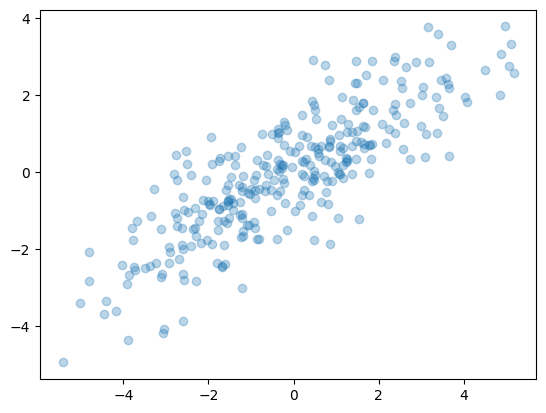

In [15]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.3)

Seeing this scatterplot of our dataset we can be happy with it as we can clearly see which will be the principal component of our dataset.

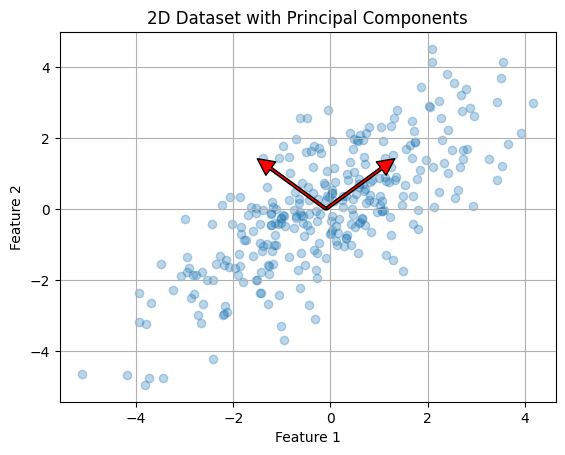

In [ ]:
X_pca = pca_eigendecomposition(X_transformed, num_components=2)


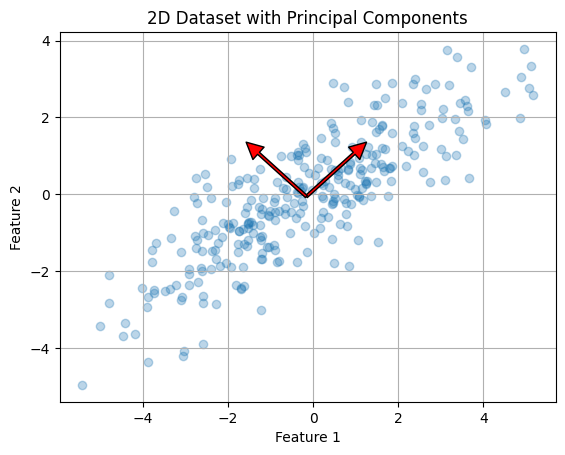

In [17]:
X_pca = pca_eigendecomposition(X_transformed, num_components=2)


As we know that we can have at most the number of features weahve in our dataset. We have a two features in our dataset. So, we have two principal component. I think that there is no surprise with the two principal components that we  have find.

In [ ]:
print(X_pca[:4, ])

[[ 0.56285947 -0.92044496]
 [ 3.00777439 -0.52670694]
 [-1.26642514 -0.97397556]
 [-0.16910977 -0.51588681]]


Here, we can see the first four reconstructed values based on the two principal components.

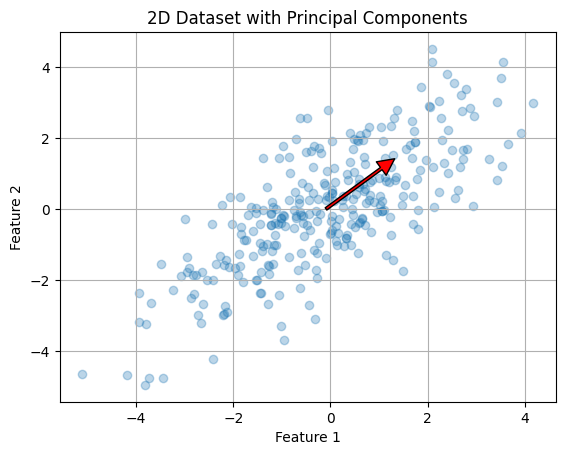

In [ ]:
X_pca = pca_eigendecomposition(X_transformed, num_components=1)


Now, here we have the same. But instead of the two principal components taking one principal component. As we could imagine tis component will be the same as one of the two from the previous PCA as we have used the same dataset.

I have thought that it would be a good idea to test how PCA using eigendecomposition and PCA using SVD would behave fro the different sizes. So, first I have taken five different observation sizes with 1000 features fixed and then I have taken 5 different features sizes with 1000 observations fixed.

Observation size: 500
Time for PCA using eigendecomposition: 2.6571881771087646
Time for PCA using SVD: 1.2326228618621826
-----------------------------------
Observation size: 1000
Time for PCA using eigendecomposition: 2.4835400581359863
Time for PCA using SVD: 2.603480815887451
-----------------------------------
Observation size: 5000
Time for PCA using eigendecomposition: 2.741366386413574
Time for PCA using SVD: 3.8505747318267822
-----------------------------------
Observation size: 10000
Time for PCA using eigendecomposition: 2.8028032779693604
Time for PCA using SVD: 4.799077987670898
-----------------------------------
Observation size: 50000
Time for PCA using eigendecomposition: 4.392738103866577
Time for PCA using SVD: 15.900889873504639
-----------------------------------


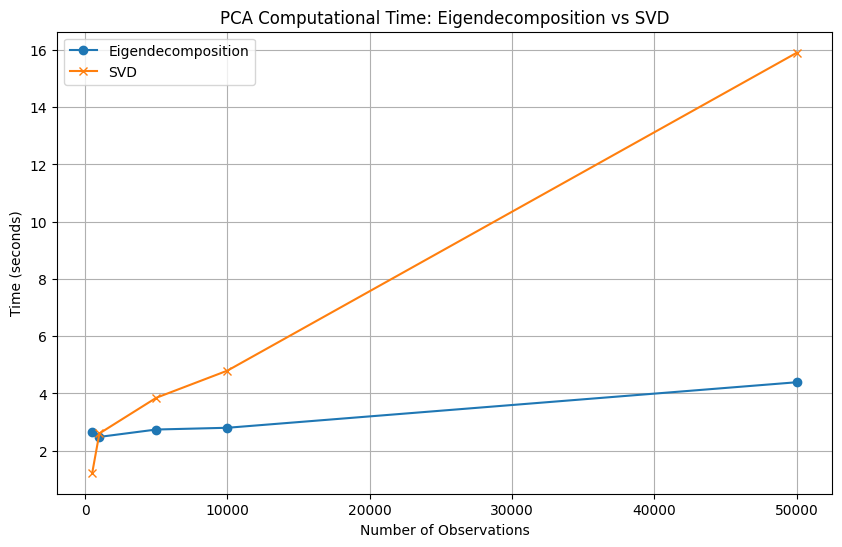

In [ ]:
# Different numbers of observations
observation_sizes = [500, 1000, 5000, 10000, 50000]

# Arrays to store times for each method and observation size
times_eigen = []
times_svd = []

# Looping through different observation sizes
for n in observation_sizes:
    # Generating a random dataset
    np.random.seed(0)
    X_large = np.random.randn(n, 1000)  # n samples, 1000 features

    # Measuring the time for PCA using eigendecomposition
    start_time_eigen = time.time()
    eigenvalues, eigenvectors = pca_eigendecomposition_matrixs(X_large)
    time_eigen = time.time() - start_time_eigen
    times_eigen.append(time_eigen)

    # Measuring the time for PCA using SVD
    start_time_svd = time.time()
    U, S, Vt = pca_svd(X_large)
    time_svd = time.time() - start_time_svd
    times_svd.append(time_svd)

    # Printing the results
    print(f"Observation size: {n}")
    print("Time for PCA using eigendecomposition:", time_eigen)
    print("Time for PCA using SVD:", time_svd)
    print("-----------------------------------")

plt.figure(figsize=(10, 6))
plt.plot(observation_sizes, times_eigen, label='Eigendecomposition', marker='o')
plt.plot(observation_sizes, times_svd, label='SVD', marker='x')
plt.xlabel('Number of Observations')
plt.ylabel('Time (seconds)')
plt.title('PCA Computational Time: Eigendecomposition vs SVD')
plt.legend()
plt.grid(True)
plt.show()


Now, here we have the times that take for PCA using eigendecompostion and SVD with a fixed value of 1000 features while we are changing the number of observations that we have in the dataset. As we can see, at first Eigendecompositions is much slower than the SVD, but, finally, we see that SVD is performing worse. Particulary, we can see that when we have more observations than features, SVD is faster than Eigendecomposition. When we have the same amount of observations and features, the times are really close. However, SVD is still a bit faster than Eigendecomposition. Finally, when we have more observatiosn than features Eigendecomposition is faster than SVD. Also, we can see that the times of SVD increase a lot when the number of bsevations gets higher, while the time of the Eigendeomposition does not increase too much.

Observation size: 100
Time for PCA using eigendecomposition: 0.01612257957458496
Time for PCA using SVD: 0.07854223251342773
-----------------------------------
Observation size: 500
Time for PCA using eigendecomposition: 0.5372803211212158
Time for PCA using SVD: 0.623126745223999
-----------------------------------
Observation size: 1000
Time for PCA using eigendecomposition: 1.8292877674102783
Time for PCA using SVD: 2.1224277019500732
-----------------------------------
Observation size: 2500
Time for PCA using eigendecomposition: 12.901341676712036
Time for PCA using SVD: 2.866931200027466
-----------------------------------
Observation size: 5000
Time for PCA using eigendecomposition: 80.71060109138489
Time for PCA using SVD: 3.551251173019409
-----------------------------------


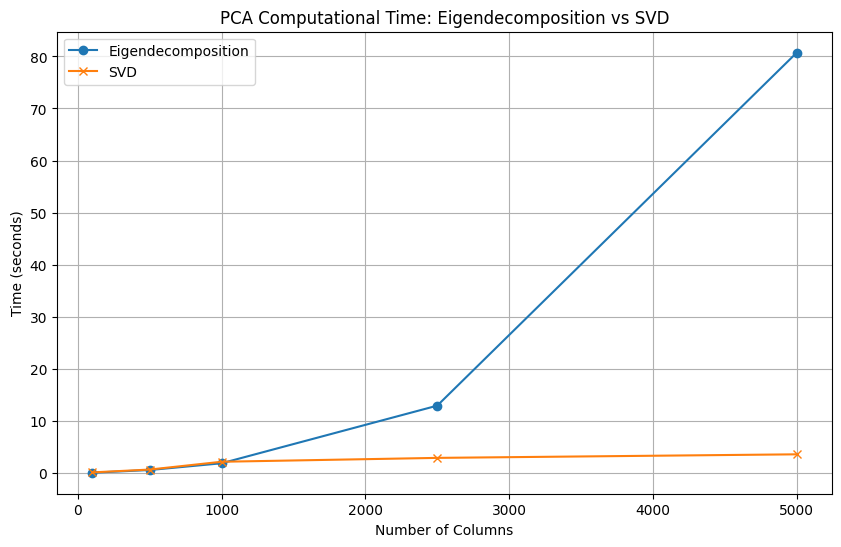

In [ ]:
# Different numbers of observations
features_sizes = [100, 500, 1000, 2500, 5000]

# Arrays to store times for each method and observation size
times_eigen = []
times_svd = []

# Looping through different observation sizes
for n in features_sizes:
    # Generating a random dataset
    np.random.seed(0)
    X_large = np.random.randn(1000, n)  

    # Measuring the time for PCA using eigendecomposition
    start_time_eigen = time.time()
    eigenvalues, eigenvectors = pca_eigendecomposition_matrixs(X_large)
    time_eigen = time.time() - start_time_eigen
    times_eigen.append(time_eigen)

    # Measuring the time for PCA using SVD
    start_time_svd = time.time()
    U, S, Vt = pca_svd(X_large)
    time_svd = time.time() - start_time_svd
    times_svd.append(time_svd)

    # Printing the results
    print(f"Observation size: {n}")
    print("Time for PCA using eigendecomposition:", time_eigen)
    print("Time for PCA using SVD:", time_svd)
    print("-----------------------------------")

plt.figure(figsize=(10, 6))
plt.plot(features_sizes, times_eigen, label='Eigendecomposition', marker='o')
plt.plot(features_sizes, times_svd, label='SVD', marker='x')
plt.xlabel('Number of Features')
plt.ylabel('Time (seconds)')
plt.title('PCA Computational Time: Eigendecomposition vs SVD')
plt.legend()
plt.grid(True)
plt.show()


Now, here we can see some results that provide us with some similar insights as before. At first, we can see that Eigendecomposition is faster again for those datasets that have more observations than features. Again, when we have the same amount of observations and features both spend apporximately the same amount of time. Finally, is evident that SVD performs faster than Eigendecompostion with datasets that have more Features than observations.

## Numerical Stability

In this analysis, we explored the numerical stability of eigendecomposition and Singular Value Decomposition (SVD) when applied to a near-singular matrix. Our objective was to understand how each method responds to small perturbations in the data, which is a common scenario in real-world data analysis.

In [ ]:
# Creating a near-singular matrix that will perform as a covariance matrix
np.random.seed(0)
A = np.random.rand(10, 10)
A[0, 0] = 1e-10  # Making the matrix close to singular

# Performing eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(A)

# Performing SVD
U, S, Vt = np.linalg.svd(A)

# Analyze the results - Compare eigenvalues and singular values
print("Eigenvalues:", eigenvalues)
print("Singular values:", S)

# Perturbing the matrix
A_perturbed = A + np.random.normal(0, 1e-10, A.shape)

# Eigendecomposition and SVD on perturbed matrix
perturbed_eigenvalues, _ = np.linalg.eig(A_perturbed)
_, perturbed_S, _ = np.linalg.svd(A_perturbed)

# Compare changes
print("\nChanges in eigenvalues:", np.abs(eigenvalues - perturbed_eigenvalues))
print("Changes in singular values:", np.abs(S - perturbed_S))


Eigenvalues: [ 4.75589631+0.j          0.87696261+0.1034257j   0.87696261-0.1034257j
 -0.96257116+0.j         -0.81708249+0.j         -0.60647823+0.j
 -0.37492452+0.j         -0.02989517+0.35066461j -0.02989517-0.35066461j
  0.21974143+0.j        ]
Singular values: [4.84403107 1.46470889 1.38308092 1.04302826 0.86741307 0.75083889
 0.52514715 0.31671195 0.23704247 0.06868248]

Changes in eigenvalues: [2.15317542e-10 9.09040370e-11 9.09040370e-11 4.57752947e-10
 6.18691320e-10 4.57246463e-11 1.78122961e-10 1.52013636e-10
 1.52013636e-10 9.76870251e-11]
Changes in singular values: [2.15272244e-10 8.64486260e-11 2.56179522e-11 5.18471932e-11
 5.94941874e-11 1.67153291e-10 6.68781697e-11 6.91331437e-11
 1.53018376e-10 3.89268062e-11]


### Experiment Setup

We created a near-singular matrix `A` that works as covariance matrix and then performed both eigendecomposition and SVD on this matrix. To simulate real-world data imperfections, we introduced a small random perturbation to `A` and observed the effects on the results of both methods.

### Interpretation

Both eigendecomposition and SVD showed sensitivity to the perturbations, as indicated by the changes in eigenvalues and singular values. However, the magnitude of these changes is relatively small, suggesting a degree of numerical stability in both methods.

In more extreme cases of near-singularity or ill-conditioning, we would expect SVD to demonstrate greater numerical stability compared to eigendecomposition. This is due to SVD's design, which tends to be less sensitive to small variations in the data, making it a preferred method in scenarios involving imperfect or noisy data.

### Conclusion

Our experiment suggests that while both eigendecomposition and SVD are affected by data perturbations, SVD is generally more robust and reliable for real-world datasets, which often contain small errors or variations. This robustness is crucial for accurate data analysis and interpretation, especially in high-stakes scenarios.



## Sparse Data

In this experiment, we compared the computational efficiency of Singular Value Decomposition (SVD) and eigendecomposition when applied to a sparse matrix. Our goal was to demonstrate the suitability of SVD for sparse datasets, a common scenario in data science.

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import scipy.linalg

In [ ]:
# Function to create a large sparse matrix
def create_sparse_matrix(rows, cols, density):
    # Create a matrix with binary entries (0s and 1s)
    random_matrix = np.random.binomial(1, density, size=(rows, cols))
    # Convert to float data type
    random_matrix = random_matrix.astype(float)

    return csr_matrix(random_matrix)

In [ ]:
# Creating a large sparse matrix
rows, cols, density = 5000, 5000, 0.001  # 1% density
sparse_matrix = create_sparse_matrix(rows, cols, density)

# Performing SVD on the sparse matrix
start_time = time.time()
u, s, vt = svds(sparse_matrix, k=6)  # computing the top 6 singular values/vectors
svd_time = time.time() - start_time

print("SVD on sparse matrix took:", svd_time, "seconds")

# Performing eigendecomposition on the same matrix (converted to dense)
dense_matrix = sparse_matrix.toarray()
start_time = time.time()
eigenvalues, eigenvectors = scipy.linalg.eig(dense_matrix)
eigen_time = time.time() - start_time

print("Eigendecomposition on dense matrix took:", eigen_time, "seconds")


SVD on sparse matrix took: 0.3203444480895996 seconds
Eigendecomposition on dense matrix took: 99.83887958526611 seconds


### Experiment Setup

We created a large sparse matrix (5,000 rows by 5,000 columns) with a sparsity of 1% (i.e., only 1% of the elements are non-zero). The sparse matrix was processed using:

- SVD, specifically optimized for sparse matrices (`scipy.sparse.linalg.svds`).
- Eigendecomposition, applied to the same matrix but converted to a dense format.

### Results

The computational times recorded were as follows:

- **SVD on Sparse Matrix**: 0.320 seconds
- **Eigendecomposition on Dense Matrix**: 99.839 seconds

### Analysis

1. **Efficiency of SVD**: The SVD method, optimized for sparse matrices, completed in just 0.320 seconds. This demonstrates the efficiency of algorithms designed to leverage the sparse structure of the data.

2. **Inefficiency of Eigendecomposition on Sparse Data**: In contrast, eigendecomposition, when applied to the dense version of the same matrix, took significantly longer, at 99.839 seconds. This drastic difference in computational time underscores the unsuitability of eigendecomposition for large sparse matrices.

3. **Practical Implications**: In real-world scenarios, where large sparse matrices are common (e.g., in natural language processing or recommender systems), the choice of algorithm can dramatically impact performance. SVD's ability to efficiently process sparse data makes it a more practical choice for these applications.

### Conclusion

The results of this experiment highlight the importance of choosing the right algorithm for the dataset at hand. SVD's superior performance on sparse data not only saves computational time but also allows for the processing of larger datasets that might be infeasible with methods like eigendecomposition.


## Guaranteed orthogonality

The eigenvectors derived from SVD are guranteed to be orthogonal, even in the presence of round-off errors, which is not always the case with eigendecomposition. This is crucial for PCA since the principal component are supposed to be orthogonal.

In [ ]:
# Create a random matrix that will work as covariance matrix
np.random.seed(0)
A = np.random.randn(5, 5)

# Perform SVD
U, S, Vt = np.linalg.svd(A)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(A)

# Check orthogonality of SVD vectors (U and V)
is_U_orthogonal = np.allclose(np.dot(U.T, U), np.eye(U.shape[1]))
is_V_orthogonal = np.allclose(np.dot(Vt, Vt.T), np.eye(Vt.shape[0]))

# Check orthogonality of eigenvectors
is_eigenvectors_orthogonal = np.allclose(np.dot(eigenvectors.T, eigenvectors), np.eye(eigenvectors.shape[1]))

print("Are U vectors from SVD orthogonal?", is_U_orthogonal)
print("Are V vectors from SVD orthogonal?", is_V_orthogonal)
print("Are eigenvectors orthogonal?", is_eigenvectors_orthogonal)

Are U vectors from SVD orthogonal? True
Are V vectors from SVD orthogonal? True
Are eigenvectors orthogonal? False


We can see that the eigenvectors of the eigendecompostion mehtod are not orthogonal bewteen them.